In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Ubuntu'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Inconsolata Medium'
plt.rcParams['axes.labelsize'] = 23
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['figure.figsize'] = (8, 4)
%matplotlib inline

In [3]:
df = pd.read_csv("data/results_rq1b.csv")

In [4]:
title_mapping = {
    'direct_deps_bloated_count': 'Number of direct dependencies',
    'direct_deps_bloated_loc': 'Size of direct dependencies (LoC)',
    'direct_files_bloated_count': 'Number of direct files',
    'direct_files_bloated_loc': 'Size of direct files (LoC)',
    'direct_functions_bloated_count': 'Number of direct functions',
    'direct_functions_bloated_loc': 'Size of direct functions(LoC)'
}


In [5]:
column_mapping = {
    'product': 'product',
    'bloated_deps_count_1': 'direct_deps_bloated_count',
    'bloated_deps_loc_1': 'direct_deps_bloated_loc',
    'bloated_files_count_1': 'direct_files_bloated_count',
    'bloated_files_loc_1': 'direct_files_bloated_loc',
    'bloated_functions_count_1': 'direct_functions_bloated_count',
    'bloated_functions_loc_1': 'direct_functions_bloated_loc',
    'used_direct_deps_count_1': 'direct_deps_used_count',
    'used_direct_deps_loc_1': 'direct_deps_used_loc',
    'used_direct_files_count_1': 'direct_files_used_count',
    'used_direct_files_loc_1': 'direct_files_used_loc',
    'used_direct_functions_count_1': 'direct_functions_used_count',
    'used_direct_functions_loc_1': 'direct_functions_used_loc',
    'transitive_bloated_dependencies_count': 'transitive_deps_bloated_count',
    'transitive_bloated_dependencies_loc': 'transitive_deps_bloated_loc',
    'transitive_bloated_files_count': 'transitive_files_bloated_count',
    'transitive_bloated_files_loc': 'transitive_files_bloated_loc',
    'transitive_bloated_functions_count': 'transitive_functions_bloated_count',
    'transitive_bloated_functions_loc': 'transitive_functions_bloated_loc',
    'transitive_used_dependencies_count': 'transitive_deps_used_count',
    'transitive_used_dependencies_loc': 'transitive_deps_used_loc',
    'transitive_used_files_count': 'transitive_files_used_count',
    'transitive_used_files_loc': 'transitive_files_used_loc',
    'transitive_used_functions_count': 'transitive_functions_used_count',
    'transitive_used_functions_loc': 'transitive_functions_used_loc',
}


In [6]:
df = df.rename(columns=column_mapping)


In [7]:
df = df[list(column_mapping.values())]


In [8]:
df.to_csv("a.csv", index=False)

In [16]:
df

,product,direct_deps_bloated_count,direct_deps_bloated_loc,direct_files_bloated_count,direct_files_bloated_loc,direct_functions_bloated_count,direct_functions_bloated_loc,direct_deps_used_count,direct_deps_used_loc,direct_files_used_count,direct_files_used_loc,direct_functions_used_count,direct_functions_used_loc,transitive_deps_bloated_count,transitive_deps_bloated_loc,transitive_files_bloated_count,transitive_files_bloated_loc,transitive_functions_bloated_count,transitive_functions_bloated_loc,transitive_deps_used_count,transitive_deps_used_loc,transitive_files_used_count,transitive_files_used_loc,transitive_functions_used_count,transitive_functions_used_loc
0,mozillasecurity/grizzly,0,0,138,20385,1783,22632,8,42239,55,21854,346,7982,6,25649,117,51986,2835,44202,6,44395,30,18058,240,4284
1,mozillasecurity/funfuzz,0,0,391,112925,5316,91953,3,122886,13,9961,36,1065,3,16187,53,26200,644,18267,1,11176,2,1163,3,77
2,buckket/twtxt,0,0,63,21223,1921,24813,4,39419,21,18196,136,3406,4,4982,43,17991,664,16683,5,20030,9,7021,39,808
3,simetenn/uncertainpy,0,0,315,115288,2951,47288,8,131991,54,16703,161,3906,13,53380,1337,657743,24663,542784,8,716440,102,112077,563,23951
4,foremast/foremast,4,29789,485,93283,5622,62912,10,85002,41,21508,281,5960,24,197873,899,274651,13291,167983,9,94540,35,17762,163,2730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,pymeasure/pymeasure,0,0,663,203930,13841,262362,6,413793,201,209863,1692,50682,4,11713,47,14290,607,5565,1,2636,1,59,1,21
1022,pydata/pandas-datareader,0,0,175,49161,4904,103261,3,173693,101,124532,1086,35761,4,5752,301,129099,4705,113746,5,166789,39,43442,167,6693
1023,pydata/patsy,0,0,204,82694,3615,88847,2,134983,35,52289,227,9835,0,0,0,0,0,0,0,0,0,0,0,0
1024,pydata/xarray,0,0,342,126019,8171,186280,3,299196,140,173177,1224,45859,2,1025,45,10619,438,3135,2,10252,2,658,8,311


findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


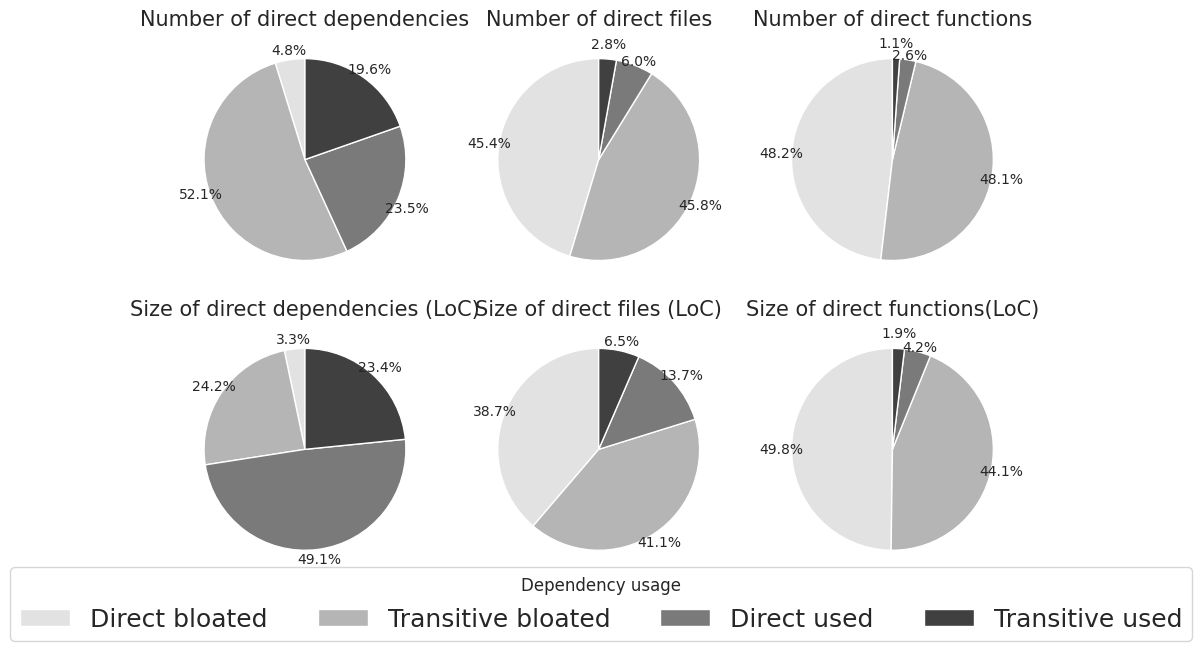

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
ax_iter = iter(axes.flatten())

# New metrics mapping reordered for the desired sequence
metrics_mapping = {
    'direct_deps_bloated_count': ['transitive_deps_bloated_count', 'direct_deps_used_count', 'transitive_deps_used_count'],
    'direct_files_bloated_count': ['transitive_files_bloated_count', 'direct_files_used_count', 'transitive_files_used_count'],
    'direct_functions_bloated_count': ['transitive_functions_bloated_count', 'direct_functions_used_count', 'transitive_functions_used_count'],
    'direct_deps_bloated_loc': ['transitive_deps_bloated_loc', 'direct_deps_used_loc', 'transitive_deps_used_loc'],
    'direct_files_bloated_loc': ['transitive_files_bloated_loc', 'direct_files_used_loc', 'transitive_files_used_loc'],
    'direct_functions_bloated_loc': ['transitive_functions_bloated_loc', 'direct_functions_used_loc', 'transitive_functions_used_loc'],
}


labels = ['Direct bloated', 'Transitive bloated', 'Direct used', 'Transitive used']

for direct_metric, other_metrics in metrics_mapping.items():
    ax = next(ax_iter)

    # Calculate values for all 4 categories
    direct_bloated_value = df[direct_metric].sum()
    transitive_bloated_value = df[other_metrics[0]].sum()
    direct_used_value = df[other_metrics[1]].sum()
    transitive_used_value = df[other_metrics[2]].sum()
    
    values = [direct_bloated_value, transitive_bloated_value, direct_used_value, transitive_used_value]
    
    wedges, texts, autotexts = ax.pie(values, autopct='%1.1f%%', startangle=90, pctdistance=1.1,
                                     colors=sns.color_palette("Greys", 4))

    # Set white edge color for each wedge
    for wedge in wedges:
        wedge.set_edgecolor('white')
    for i in range(len(autotexts) - 1):
        x1, y1 = autotexts[i].get_position()
        x2, y2 = autotexts[i+1].get_position()
        if abs(y2 - y1) < 0.1:  # Check if y-coordinates are close
            if y1 < y2:
                y1_new = y1 - 0.05
                y2_new = y2 + 0.05
            else:
                y1_new = y1 + 0.05
                y2_new = y2 - 0.05
            autotexts[i].set(y=y1_new)
            autotexts[i+1].set(y=y2_new)
    
    # Adjust font size for labels and autopct
    for text in texts + autotexts:
        text.set(size=10)

    ax.set_title(title_mapping[direct_metric], fontsize=15)

fig.legend(wedges, labels, title="Dependency usage", loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

plt.tight_layout()
fig.savefig("figures/rq1b.pdf", format="pdf", bbox_inches='tight')


In [20]:
df.direct_deps_bloated_count.sum()

1026